<head><font color='orange' size=20>Lojas Rossmann: Previsão de Vendas</font></head>



<text>Marcos Galvão</text>

# Agenda

- Contexto
- Problema de Negócio
- Solução Desenvolvida
- Próximos Passos

## Contexto

- A Rossmann opera com 3.000 farmácias em 7 países na Europa; 
- O CFO defini o orçamento com base em uma previsão de vendas das próximas 6 semanas;
- Cada gerente de loja realiza a previsão individualmente baseado na sua experiência pessoal.

## Problema de Negócio

- Não há uma metodologia nas previsões realizadas;
- As previsões são realizadas manualmente;
- As entregas das previsões são assincronas;

<h3>Expectativa do CFO</h3>

- Criar um produto de dados que padronize a previsão de vendas de todas as lojas;
- Centralizar todas as previsão em uma única aplicação de forma sincrona; 
- Acesso das previsão por dispositivo mobile para consultas Ad hoc.

### Solução
- Utilizar o Machine Learning para realizar as previsões;
- Disponibilizar a visualização das previsões por smartphone;

## Desenvolvimento da Solução



### Análise Exploratória

### Mapa Mental de Hipóteses

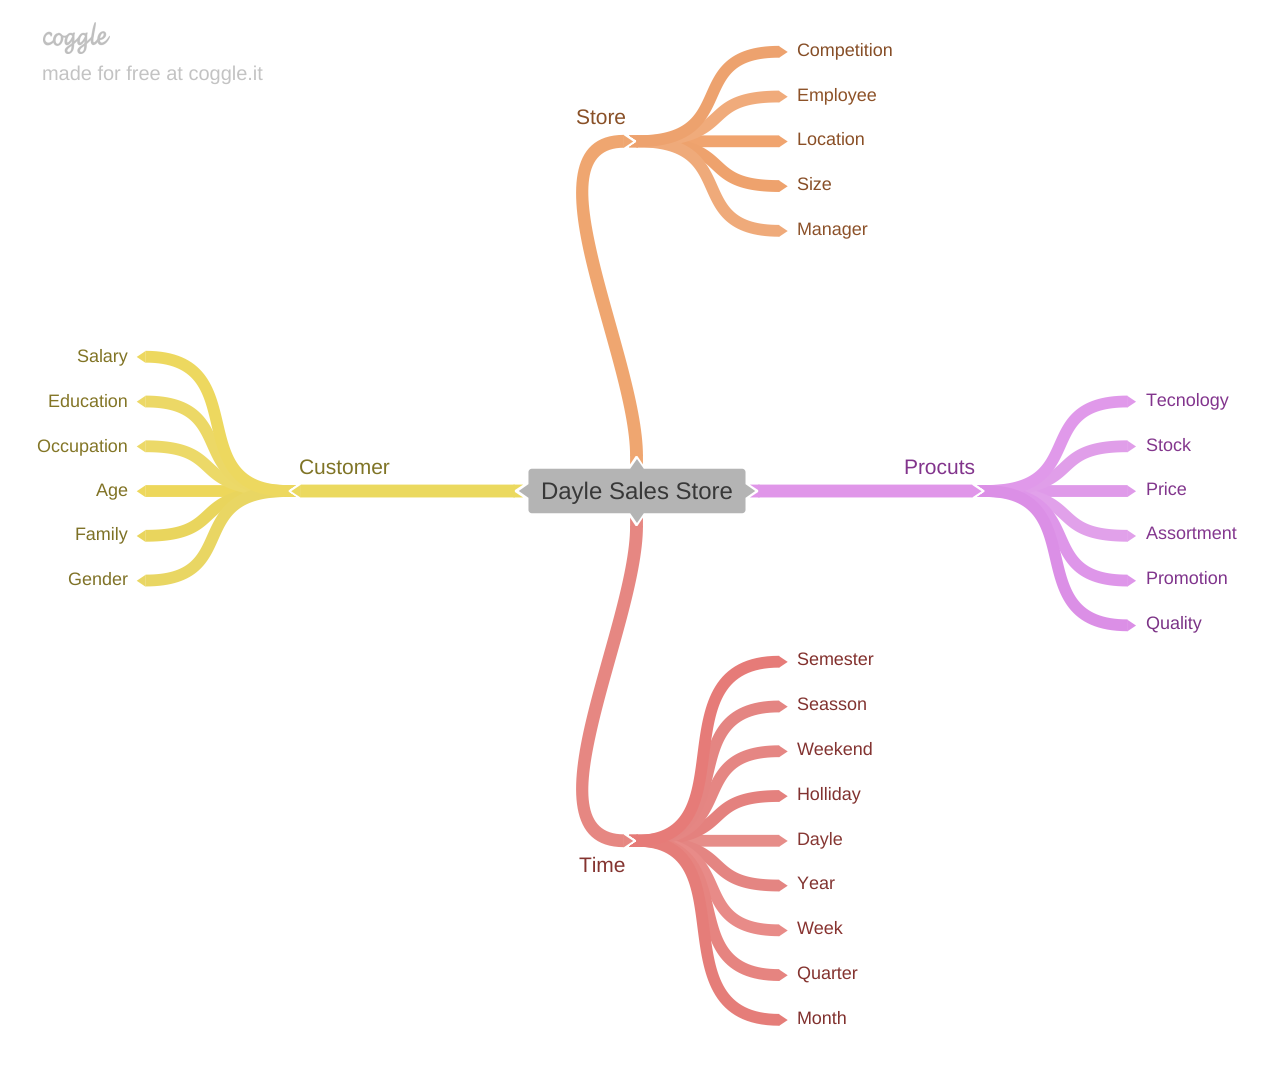

In [17]:
from IPython.display import Image
Image('img/mapa_mental_hipotesis.png', width=850)

### Hipóteses

1. Lojas com maior sortimento deveriam vender mais; 

2. Lojas com concorrentes por perto deveriam vender menos;

3. Lojas com concorrentes a mais tempo deveriam vender mais;

4. Lojas com promoção consecutivas deveriam vender mais; 

5. No natal as vendas são maiores; 

6. As vendas são maiores com o passar dos anos;

7. No segundo semestre as vendas aumentam;

8. No final de semana as vendas são menores;

9. Durante as férias escolares as vendas são menores;

10. Depois do dia 10 as vendas são maiores;

### Distribuição das Vendas

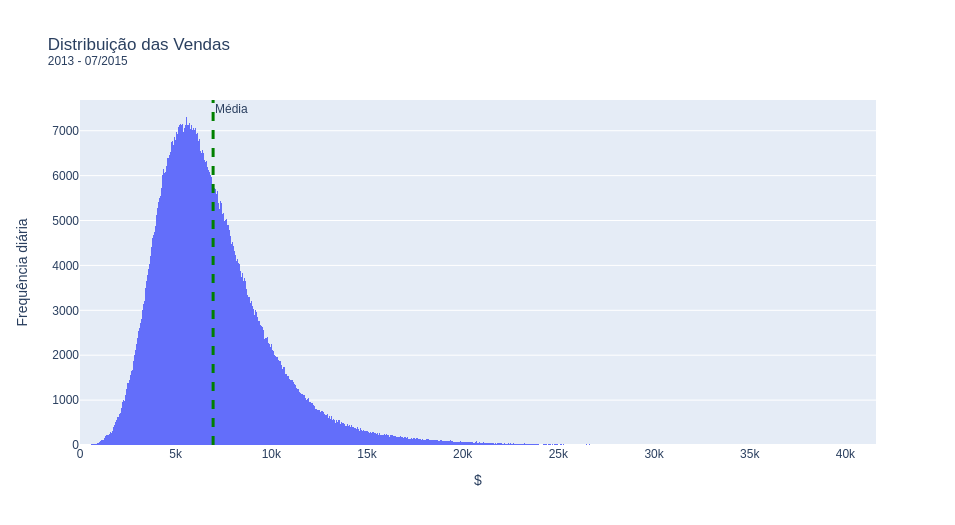

In [19]:
Image('img/distribuicao_vendas.png')

### H1 - Lojas com maior sortimento deveriam vender mais
*Falso*

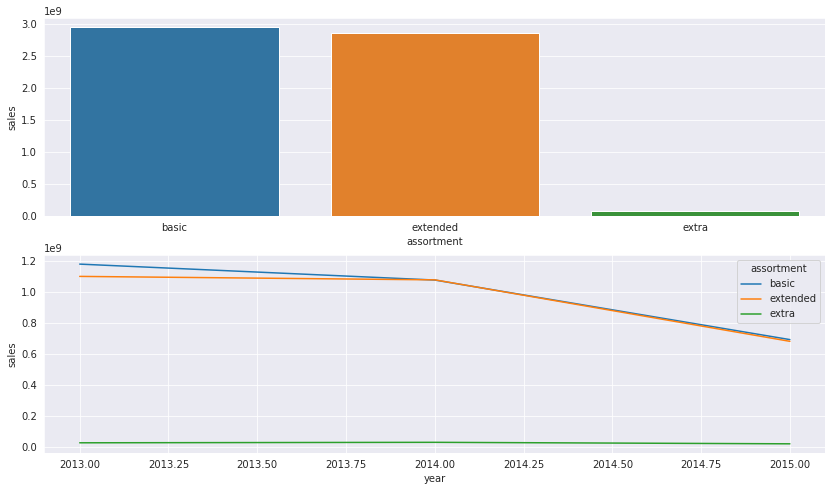

In [ ]:
plt.subplot(2, 1, 1)
aux1 = df2[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1)

plt.subplot(2, 1, 2)
aux2 = df2[['assortment', 'year', 'sales']].groupby(['assortment', 'year']).sum().reset_index()
sns.lineplot(x='year', y='sales', hue='assortment', data=aux2);

### Sortimentos das Lojas 

Basic       52.7%

Extended    46.3%

Extra       1%

### H2 - Lojas com concorrentes por perto deveriam vender menos

*Falso*

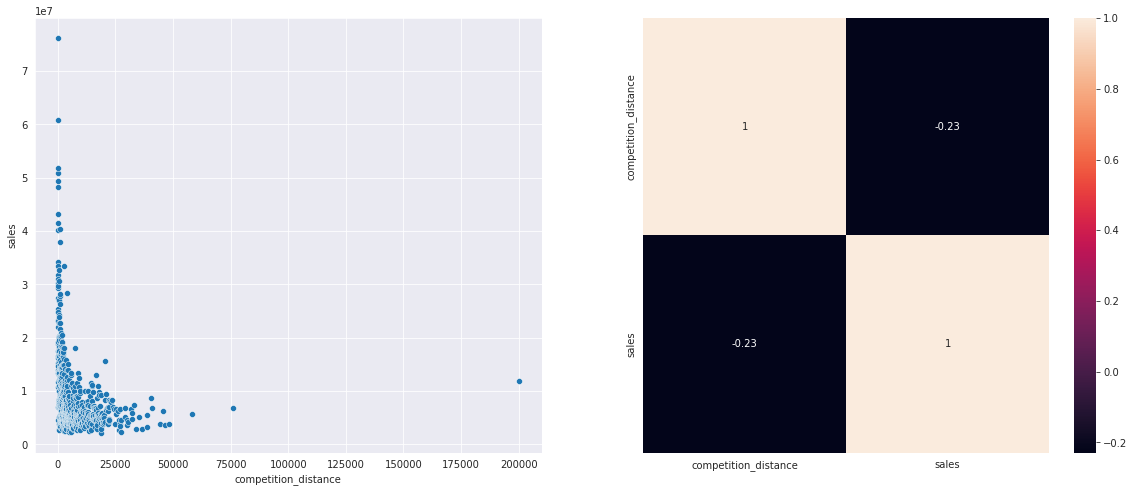

In [20]:
Image('img/distancia_concorrente.png')

### H3 - Lojas com concorrentes a mais tempo deveriam vender mais;

*Falso*

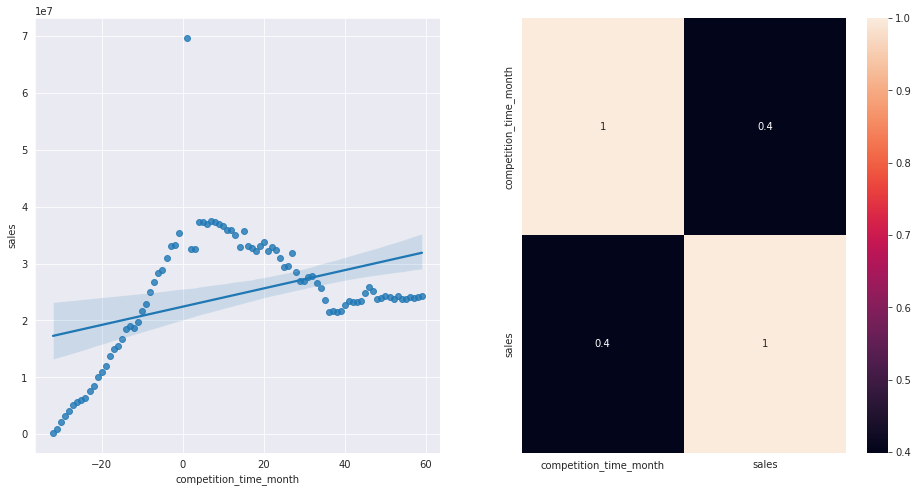

In [22]:
Image('img/tempo_competicao.png')

### Sub-hipótese

Quando o segmento é atrativo por alta demanda, o período de abertura de novos competidores (novos entrantes é menor).

### H6 - Lojas com promoção consecutivas deveriam vender mais

*Falso*

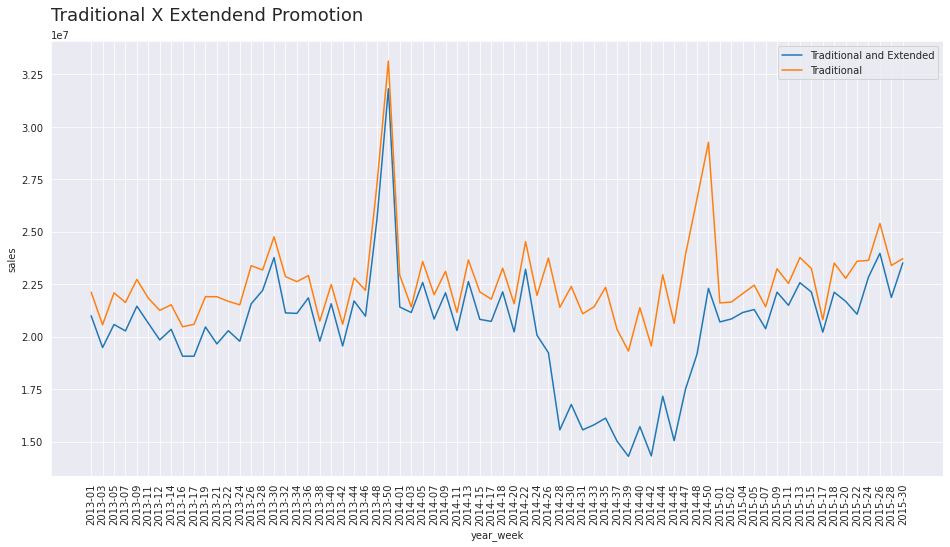

In [ ]:
# traditional and extended
aux1 = df2[(df2['promo'] == 1) & (df2['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()

sns.lineplot(x='year_week', y='sales', data=aux1, label='Traditional and Extended')
plt.title('Traditional X Extendend Promotion', loc='left', fontsize=18, pad=20.8)
plt.xticks(rotation=90);

# traditional
aux2 = df2[(df2['promo'] == 1) & (df2['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
sns.lineplot(x='year_week', y='sales', data=aux2, label='Traditional')
plt.title('Traditional X Extendend Promotion', loc='left', fontsize=18, pad=20.8)
plt.xticks(rotation=90)
plt.legend();

### H7 - No natal as vendas são maiores

*Falso*

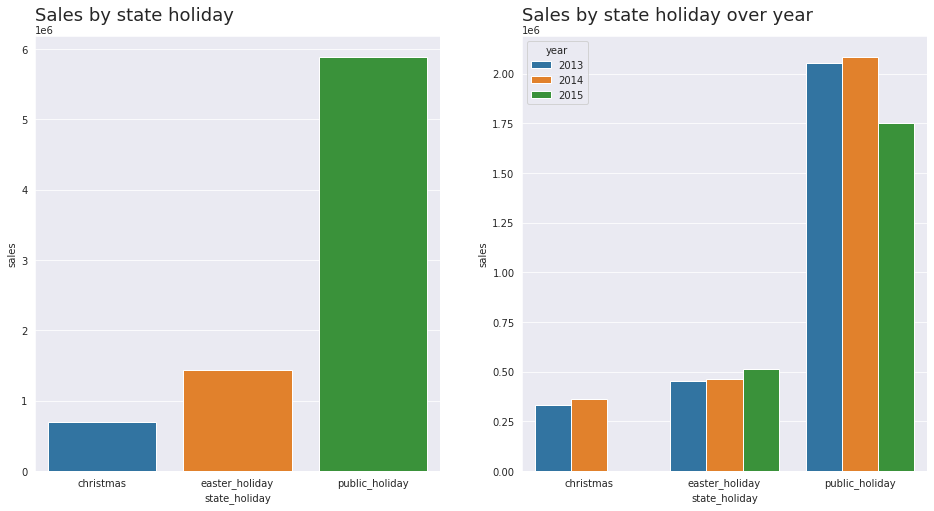

In [ ]:
aux = df2[df2['state_holiday'] != 'regular_day']

plt.subplot(1, 2, 1)
aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1)
plt.title('Sales by state holiday', loc='left', fontsize=18, pad=15.5);

plt.subplot(1, 2, 2)
aux2 = aux[['state_holiday', 'sales', 'year']].groupby(['state_holiday', 'year']).sum().reset_index()
sns.barplot(x='state_holiday', y='sales', hue='year', data=aux2)
plt.title('Sales by state holiday over year', loc='left', fontsize=18, pad=15.5);

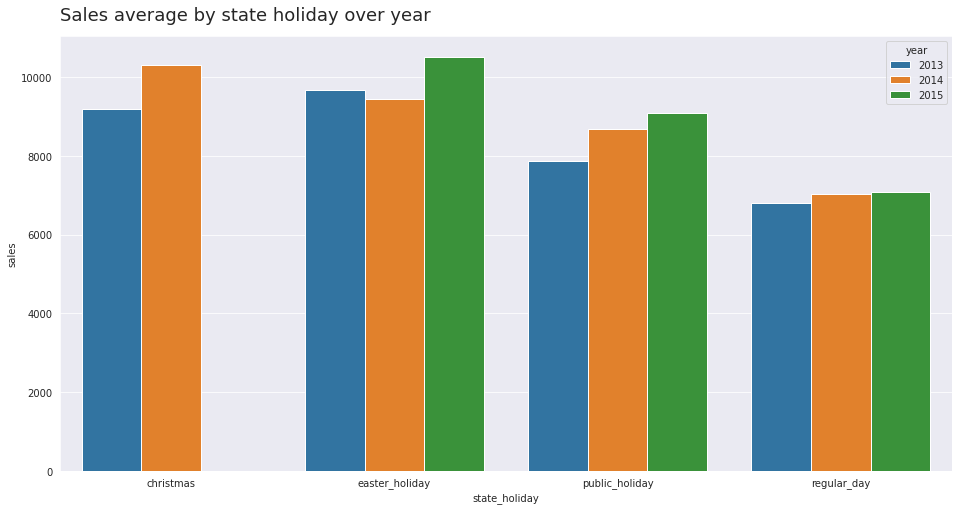

In [ ]:
aux3 = df2[['state_holiday', 'year', 'sales']].groupby(['state_holiday', 'year']).mean().reset_index()

sns.barplot(x='state_holiday', y='sales', hue='year', data=aux3)
plt.title('Sales average by state holiday over year', loc='left', fontsize=18, pad=15.5);

### H8 - As vendas são maiores com o passar dos anos

*Falso*

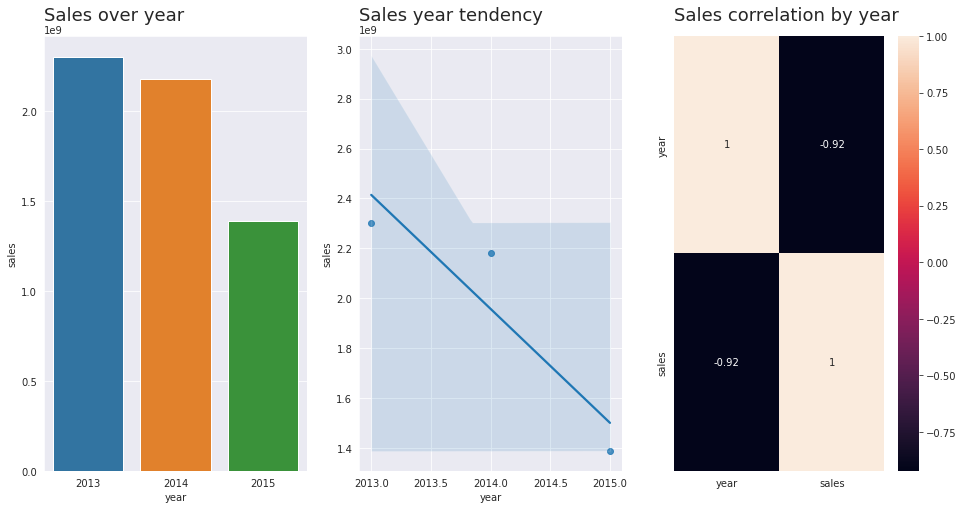

In [ ]:
aux1 = df2[['year', 'sales']].groupby('year').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='year', y='sales', data=aux1)
plt.title('Sales over year', loc='left', fontsize=18, pad=15.5)

plt.subplot(1, 3, 2)
sns.regplot(x='year', y='sales', data=aux1)
graph_info('Sales year tendency')

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(), annot=True)
graph_info('Sales correlation by year')

### H9 - No segundo semestre as vendas aumentam

*Falso*

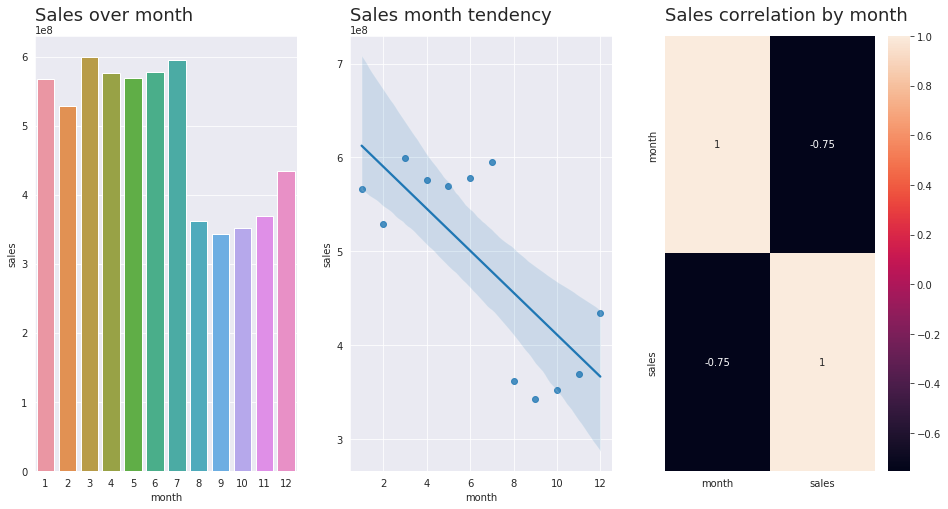

In [ ]:
aux1 = df2[['month', 'sales']].groupby('month').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='month', y='sales', data=aux1)
plt.title('Sales over month', loc='left', fontsize=18, pad=15.5)

plt.subplot(1, 3, 2)
sns.regplot(x='month', y='sales', data=aux1)
graph_info('Sales month tendency')

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(), annot=True)
graph_info('Sales correlation by month')

### H10 - No final de semana as vendas são menores;

*Verdadeiro*

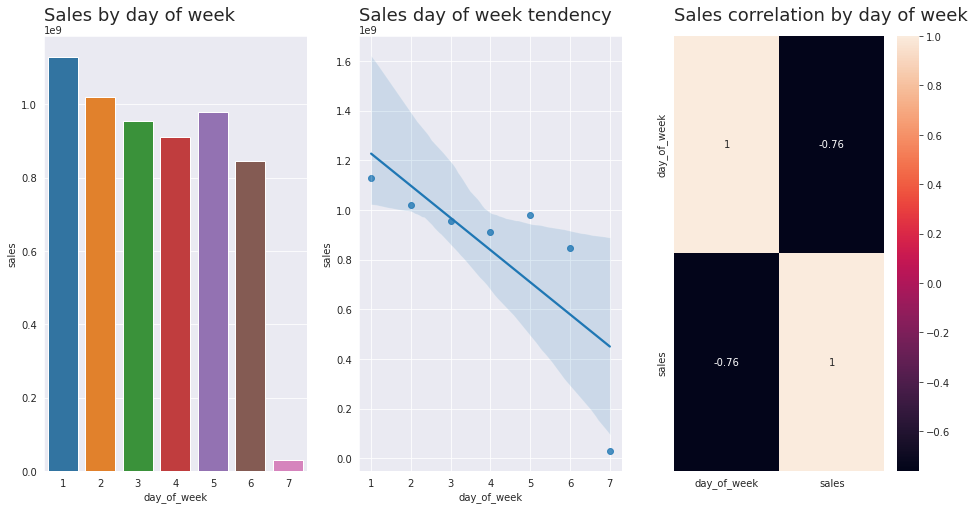

In [ ]:
aux1 = df2[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='day_of_week', y='sales', data=aux1)
plt.title('Sales by day of week', loc='left', fontsize=18, pad=15.5)

plt.subplot(1, 3, 2)
sns.regplot(x='day_of_week', y='sales', data=aux1)
graph_info('Sales day of week tendency')

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(), annot=True)
graph_info('Sales correlation by day of week')

### H11 - Durante as férias escolares as vendas são menores

*Verdadeiro*

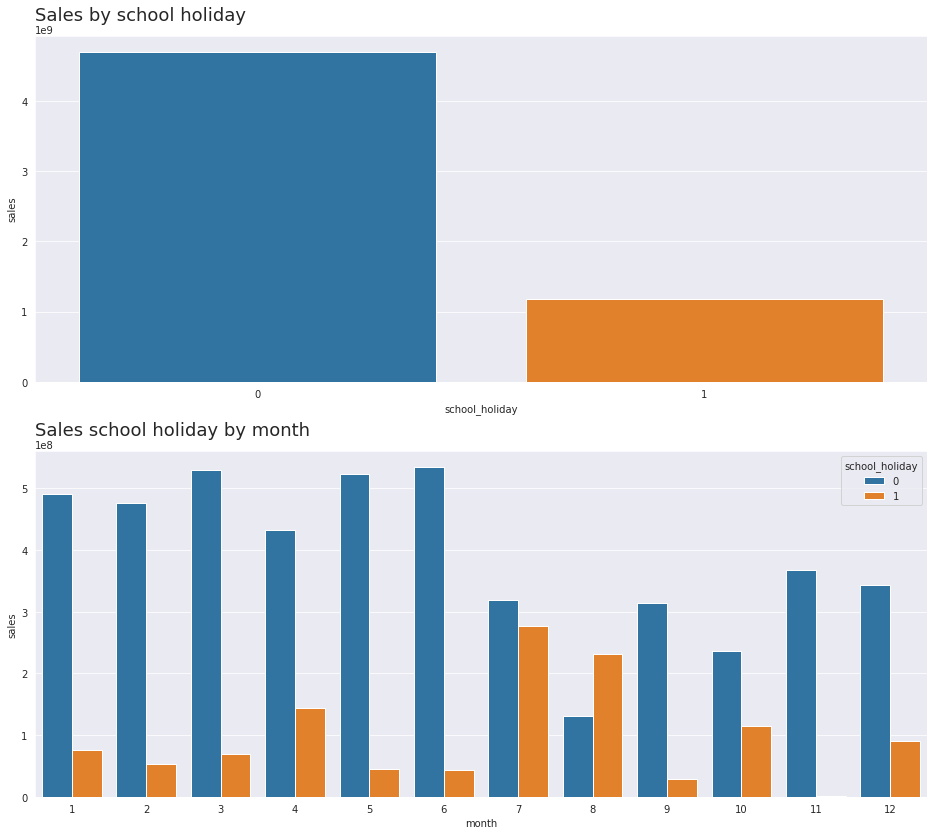

In [ ]:
aux1 = df2[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

plt.figure(figsize=(16, 14))
plt.subplot(2, 1, 1)
sns.barplot(x='school_holiday', y='sales', data=aux1)
plt.title('Sales by school holiday', loc='left', fontsize=18, pad=15.5)

aux2 = df2[['school_holiday', 'sales', 'month']].groupby(['school_holiday', 'month']).sum().reset_index()
plt.subplot(2, 1, 2)
sns.barplot(x='month', y='sales', hue='school_holiday', data=aux2)
graph_info('Sales school holiday by month')

### H12 - Depois do dia 10 as vendas são maiores;

*Falso*

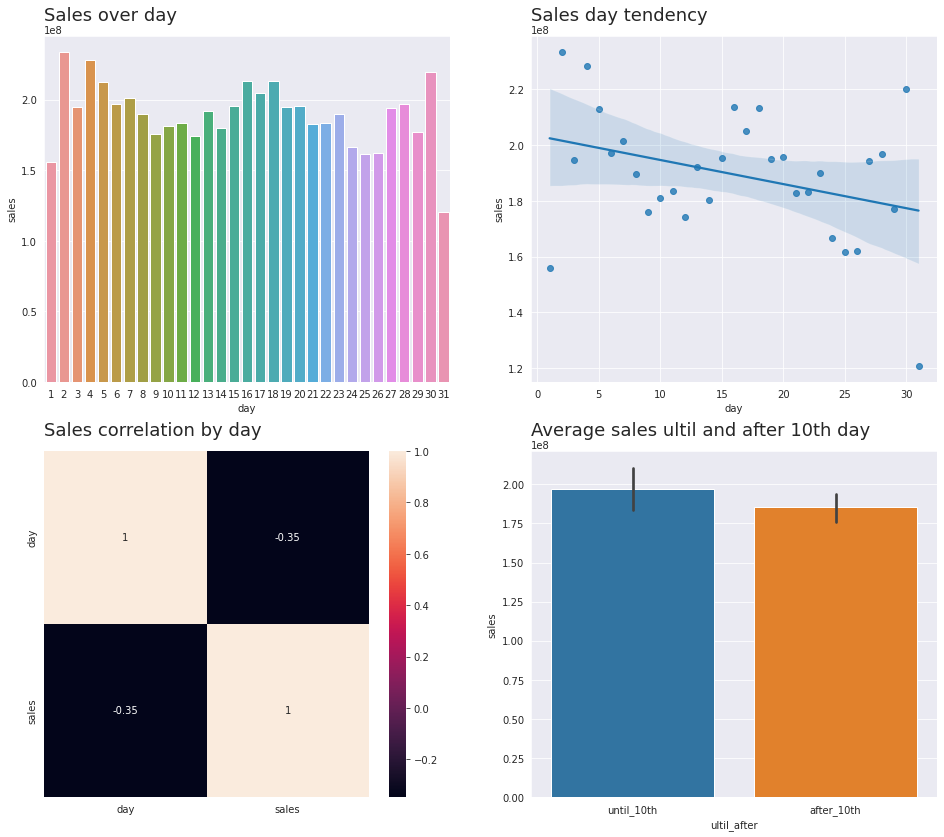

In [ ]:
aux1 = df2[['day', 'sales']].groupby('day').sum().reset_index()

plt.figure(figsize=(16, 14))
plt.subplot(2, 2, 1)
sns.barplot(x='day', y='sales', data=aux1)
plt.title('Sales over day', loc='left', fontsize=18, pad=15.5)

plt.subplot(2, 2, 2)
sns.regplot(x='day', y='sales', data=aux1)
graph_info('Sales day tendency')

plt.subplot(2, 2, 3)
sns.heatmap(aux1.corr(), annot=True)
graph_info('Sales correlation by day')

plt.subplot(2, 2, 4)
aux1['ultil_after'] = aux1['day'].apply(lambda x: 'until_10th' if x <= 10 else 'after_10th')
aux2 = aux1[['ultil_after', 'sales']].groupby('ultil_after').mean().reset_index()
sns.barplot(x='ultil_after', y='sales', data=aux1)
graph_info('Average sales ultil and after 10th day')

### Sumário das Hipóteses

In [2]:
from tabulate import tabulate
tab = [
    ['Hipótese', 'Resultado'],
    ['Lojas com maior sortimento deveriam vender mais', 'Falso'],
    ['Lojas com concorrentes por perto deveriam vender menos', 'Falso'],
    ['Lojas com concorrentes a mais tempo deveriam vender mais', 'Falso'],
    ['Lojas com promoção consecutivas deveriam vender mais', 'Falso'],
    ['No natal as vendas são maiores', 'Falso'],
    ['As vendas são maiores com o passar dos anos', 'Falso'],
    ['No segundo semestre deveriam aumentar as vendas', 'Falso'],
    ['No final de semana as vendas são menores', 'Verdadeiro'],
    ['Durante as férias escolares as vendas são menores', 'Verdadeiro'],
    ['Depois do dia 10 de cada mais as vendas deveriam ser maiores', 'Falso']]

print(tabulate(tab, headers='firstrow'))

Hipótese                                                      Resultado
------------------------------------------------------------  -----------
Lojas com maior sortimento deveriam vender mais               Falso
Lojas com concorrentes por perto deveriam vender menos        Falso
Lojas com concorrentes a mais tempo deveriam vender mais      Falso
Lojas com promoção consecutivas deveriam vender mais          Falso
No natal as vendas são maiores                                Falso
As vendas são maiores com o passar dos anos                   Falso
No segundo semestre deveriam aumentar as vendas               Falso
No final de semana as vendas são menores                      Verdadeiro
Durante as férias escolares as vendas são menores             Verdadeiro
Depois do dia 10 de cada mais as vendas deveriam ser maiores  Falso


# Modelagem dos Dados

## Seleção dos atributos com o Boruta

store

promo

store_type

assortment

competition_distance

competition_open_since_month

competition_open_since_year

promo2

promo2_since_week

promo2_since_year

competition_time_month

promo_time_week

day_of_week_sin

day_of_week_cos

month_cos

day_sin

day_cos

week_of_year_cos

# Modelos Treinados

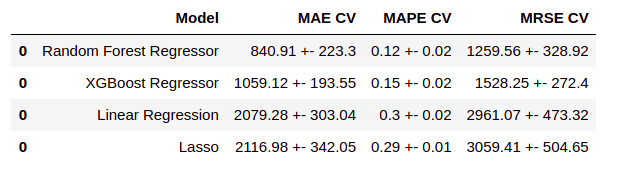

In [35]:
Image('img/modelos_ml.png')

## Performance para o negócio

In [34]:
# Sum of predictions
df91 = df9[['store', 'predictions']].groupby('store').sum().reset_index()

# Mae e Mape
df9_aux1 = df9[['store', 'sales', 'predictions']].groupby('store').apply(lambda x: mean_absolute_error(x['sales'], x['predictions'])).reset_index().rename(columns={0: 'MAE'}) 
df9_aux2 = df9[['store', 'sales', 'predictions']].groupby('store').apply(lambda x: mean_absolute_percentage_error(x['sales'], x['predictions'])).reset_index().rename(columns={0: 'MAPE'}) 

# Merge
df9_aux3 = pd.merge(df9_aux1, df9_aux2, how='inner', on='store')
df92 = pd.merge(df91, df9_aux3, how='inner', on='store')

# Scenarios
df92['worst_scenario'] = df92['predictions'] - df92['MAE']
df92['best_scenario'] = df92['predictions'] + df92['MAE']

# Order columns
df92 = df92[['store', 'predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]

In [14]:
df92.sort_values('MAE', ascending=False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
908,909,247951.640625,240441.888353,255461.392897,7509.752272,0.526084
875,876,210874.484375,206993.390052,214755.578698,3881.094323,0.310266
291,292,106527.835938,103190.096525,109865.575350,3337.739412,0.582259
594,595,415237.312500,412131.810019,418342.814981,3105.502481,0.218828
841,842,713526.750000,711155.185547,715898.314453,2371.564453,0.113178


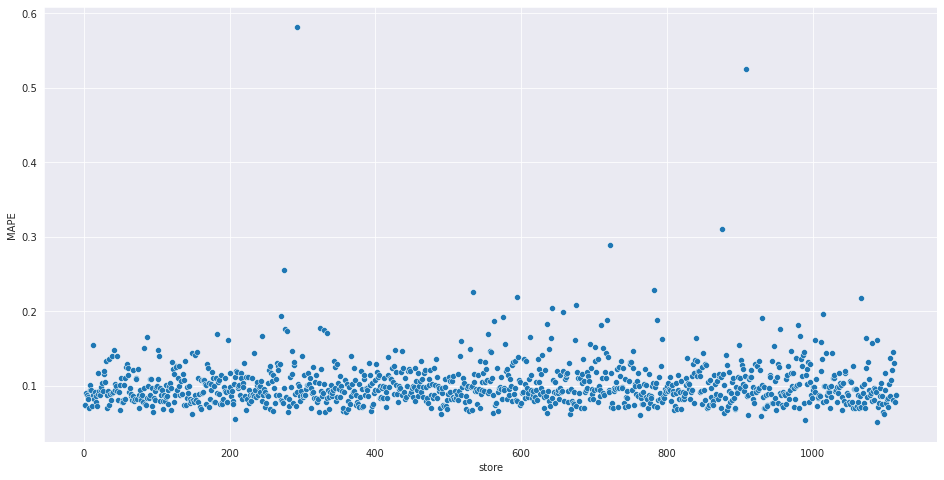

In [18]:
sns.scatterplot(x='store', y='MAPE', data=df92);

## Performance Geral

In [35]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].sum(axis=0).reset_index().rename(columns={'index': 'Scenario', 0: 'Values'})
df93['Values'] = df93['Values'].map('R$ {:,.2f}'.format)
df93

,Scenario,Values
0,predictions,"R$ 288,936,960.00"
1,worst_scenario,"R$ 288,173,160.63"
2,best_scenario,"R$ 289,700,763.82"


## Performance do Modelo

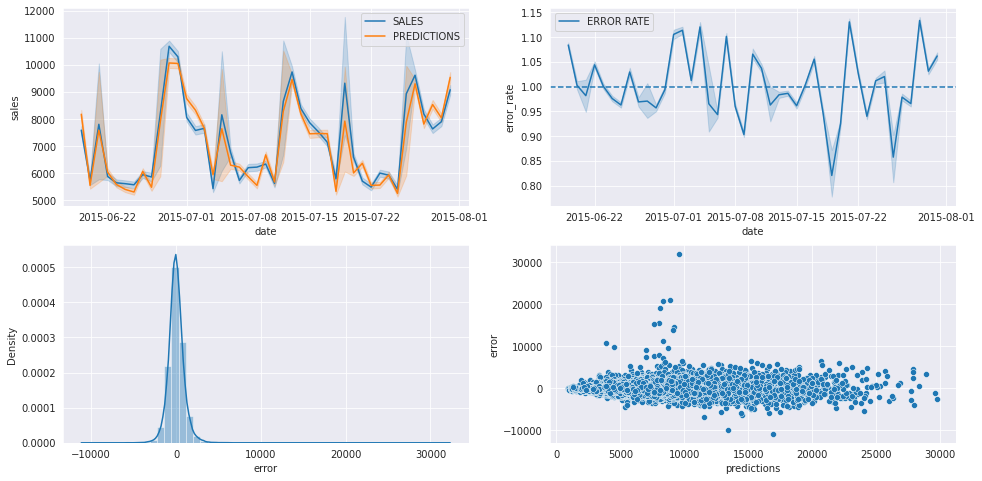

In [31]:
Image('img/ml_performance.png')